Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine=pd.read_csv("Wine.csv")

In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine1=wine.to_numpy()

In [5]:
wine1

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(wine1))
scaled_data = scaler.transform(wine1)

MinMaxScaler()


In [10]:
scaled_data

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

# PCA(Principle Component Analysis)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [12]:
x_pca = pca.transform(scaled_data)
print(wine1.shape)
print(x_pca.shape)

(178, 14)
(178, 3)


In [13]:
x_pca

array([[-8.47604157e-01, -2.43146319e-01,  2.97517320e-02],
       [-6.78650796e-01, -5.71173919e-03, -2.83969737e-01],
       [-7.00372235e-01, -1.83868071e-01,  1.97457120e-01],
       [-9.36075984e-01, -5.66966744e-01,  9.39186724e-02],
       [-4.54077045e-01, -6.33477143e-02,  2.86092048e-01],
       [-7.76939473e-01, -4.80602207e-01, -8.16766386e-02],
       [-7.28890640e-01, -2.95579430e-01, -1.12514825e-01],
       [-6.75292365e-01, -2.95566897e-01, -1.39489615e-02],
       [-6.90985736e-01, -3.03638910e-01, -2.34859068e-01],
       [-7.82069689e-01, -1.97958114e-01, -1.06020987e-01],
       [-8.65905159e-01, -3.45985665e-01, -4.57555248e-02],
       [-5.95351505e-01, -2.25308491e-01, -2.97683698e-01],
       [-6.51638553e-01, -2.29723700e-01, -1.78093164e-01],
       [-7.94438621e-01, -3.48487170e-01, -1.00092289e-01],
       [-9.52372705e-01, -5.24594574e-01, -1.11105793e-01],
       [-6.69525434e-01, -3.34299325e-01, -8.37164255e-02],
       [-6.33418157e-01, -4.48567906e-01

Text(0, 0.5, 'PCA 2')

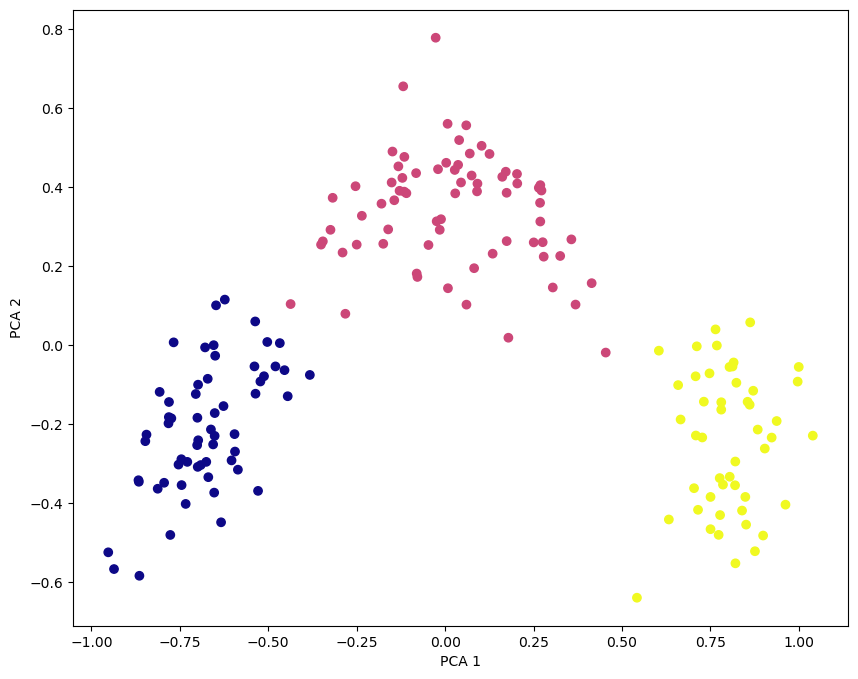

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=wine['Type'],cmap='plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [15]:
pca.components_

array([[ 0.6293282 , -0.11538334,  0.18694541, -0.00605884,  0.14898351,
        -0.06546653, -0.29907772, -0.32479936,  0.23920701, -0.18419798,
         0.08078851, -0.20189805, -0.37170465, -0.2400427 ],
       [ 0.01993018, -0.54791647, -0.2344791 , -0.16351603,  0.07620456,
        -0.18485315, -0.06219328,  0.01015402, -0.02206778, -0.02268177,
        -0.52014852,  0.24253447,  0.22768572, -0.43761144],
       [ 0.03341574, -0.08752348,  0.49369469,  0.39251169,  0.47666736,
         0.01701346,  0.26790425,  0.20701857,  0.23278396,  0.24925826,
        -0.02422129, -0.1201589 ,  0.30702977, -0.16025723]])

In [16]:
finalDf = pd.concat([pd.DataFrame(x_pca[:,0:3],columns=['pc1','pc2','pc3']),wine[['Type']]],axis=1)
finalDf

,pc1,pc2,pc3,Type
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1
...,...,...,...,...
173,0.898916,-0.482112,0.203259,3
174,0.785427,-0.353231,0.088418,3
175,0.820658,-0.552469,-0.020750,3
176,0.777268,-0.430255,-0.095511,3


In [17]:
df_comp = pd.DataFrame(pca.components_,columns=wine.columns.values)
df_comp

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.629328,-0.115383,0.186945,-0.006059,0.148984,-0.065467,-0.299078,-0.324799,0.239207,-0.184198,0.080789,-0.201898,-0.371705,-0.240043
1,0.019930,-0.547916,-0.234479,-0.163516,0.076205,-0.184853,-0.062193,0.010154,-0.022068,-0.022682,-0.520149,0.242534,0.227686,-0.437611
2,0.033416,-0.087523,0.493695,0.392512,0.476667,0.017013,0.267904,0.207019,0.232784,0.249258,-0.024221,-0.120159,0.307030,-0.160257


<AxesSubplot:>

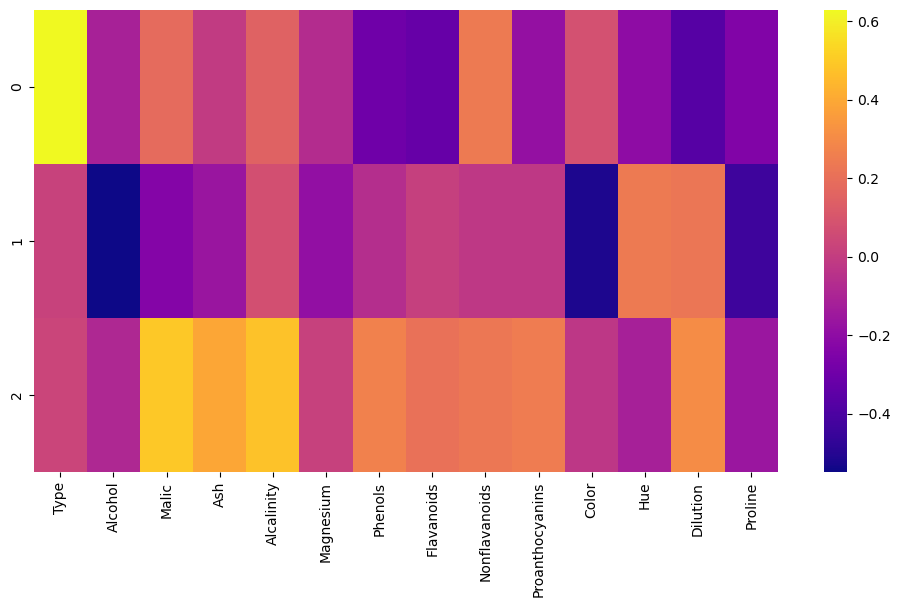

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

# Hierarchical Clustring

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [20]:
z = linkage(finalDf,method='complete',metric='euclidean')

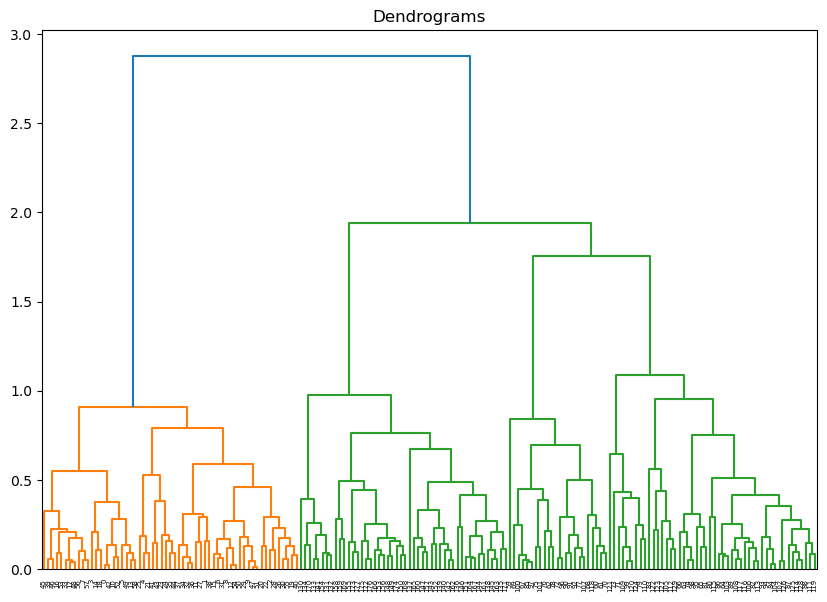

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dendrogram = shc.dendrogram(shc.linkage(finalDf,method='complete'))

In [22]:
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity='euclidean').fit(finalDf)
h_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [23]:
cluster_labels = pd.Series(h_complete.labels_)

In [24]:
finalDf["clsut"] = cluster_labels
finalDf

,pc1,pc2,pc3,Type,clsut
0,-0.847604,-0.243146,0.029752,1,1
1,-0.678651,-0.005712,-0.283970,1,1
2,-0.700372,-0.183868,0.197457,1,1
3,-0.936076,-0.566967,0.093919,1,1
4,-0.454077,-0.063348,0.286092,1,1
...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,3,2
174,0.785427,-0.353231,0.088418,3,2
175,0.820658,-0.552469,-0.020750,3,2
176,0.777268,-0.430255,-0.095511,3,2


In [25]:
finalDf['clsut'].value_counts()

0    71
1    59
2    48
Name: clsut, dtype: int64

In [26]:
h_complete.fit(finalDf)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [27]:
from sklearn.metrics import silhouette_score as sil

In [28]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean',linkage='complete')
    y = hc.fit_predict(finalDf.iloc[:,[1,2,3]])
    sc_score.append(sil(finalDf.iloc[:,[1,2,3]],y))

In [29]:
sc_score

[0.5724168689866392,
 0.6647400842321542,
 0.6364106872872944,
 0.6173179050366141,
 0.5125004434407164,
 0.4133604135759331,
 0.23888879890984638,
 0.2993031250149937]

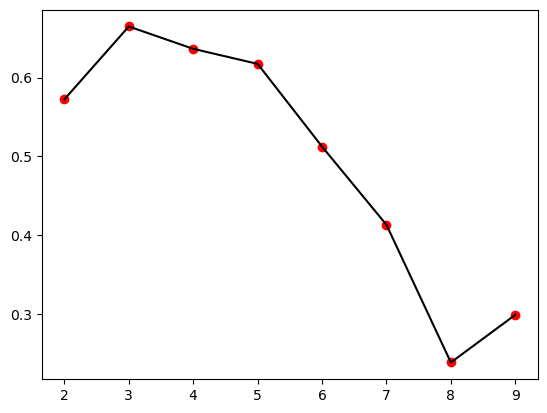

In [30]:
plt.plot(nc,sc_score,color = "black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [31]:
finalDf.drop(["clsut"],axis=1,inplace=True)

In [32]:
finalDf

,pc1,pc2,pc3,Type
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1
...,...,...,...,...
173,0.898916,-0.482112,0.203259,3
174,0.785427,-0.353231,0.088418,3
175,0.820658,-0.552469,-0.020750,3
176,0.777268,-0.430255,-0.095511,3


# KMeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
TWSS = []
k = list(range(1, 6))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(finalDf)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

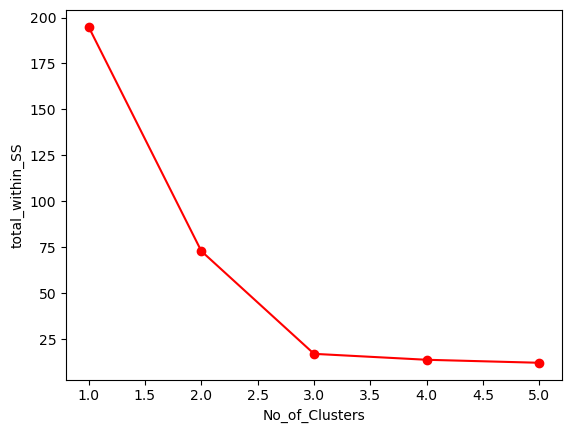

In [35]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [36]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3) 
model.fit(finalDf)

KMeans(n_clusters=3)

In [37]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
finalDf['k-means'] = mb # creating a  new column and assigning it to new column

In [38]:
finalDf

,pc1,pc2,pc3,Type,k-means
0,-0.847604,-0.243146,0.029752,1,1
1,-0.678651,-0.005712,-0.283970,1,1
2,-0.700372,-0.183868,0.197457,1,1
3,-0.936076,-0.566967,0.093919,1,1
4,-0.454077,-0.063348,0.286092,1,1
...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,3,0
174,0.785427,-0.353231,0.088418,3,0
175,0.820658,-0.552469,-0.020750,3,0
176,0.777268,-0.430255,-0.095511,3,0


In [39]:
kmeans = KMeans(n_clusters=3,random_state=0)
predict=kmeans.fit_predict(finalDf)
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [40]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(finalDf)

KMeans(n_clusters=3, random_state=42)

In [41]:
# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(3, random_state=42)
clusters_new1.fit(finalDf)

KMeans(n_clusters=3, random_state=42)

# Clustring Model of Original Data

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [43]:
wine = pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [44]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Scaling

In [45]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [46]:
df_norm = norm_func(wine.iloc[:,1:])

In [47]:
df_norm.iloc[:,:]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


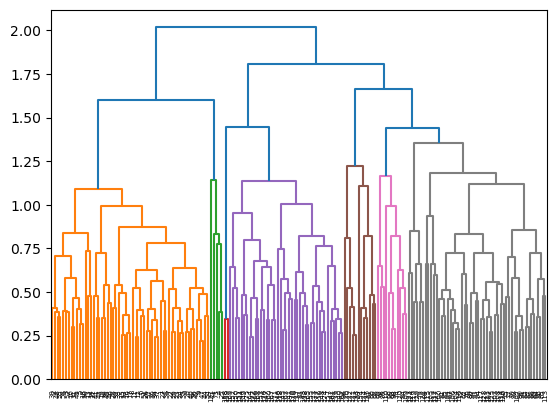

In [48]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [49]:
??AgglomerativeClustring

Object `AgglomerativeClustring` not found.


In [50]:
winehc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')

In [51]:
wine_hc=winehc.fit_predict(df_norm)

In [52]:
wine['h_clusterid']=wine_hc

In [53]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [54]:
wine.groupby(["h_clusterid"])['Type'].apply(lambda x:tuple(x))

h_clusterid
0    (2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
1    (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
2                                      (1, 1, 2, 2, 2)
3                 (2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3)
4    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: Type, dtype: object

# KMeans Clustring

In [55]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [56]:
from sklearn.cluster import KMeans

In [57]:
model_kmeans = KMeans(n_clusters = 5)
wine_scaled = model_kmeans.fit(df_norm)

In [58]:
model_kmeans.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 3, 4, 4, 0, 4, 3, 4, 3, 4, 0, 4, 4, 3, 1, 4, 4, 3, 3,
       3, 4, 3, 3, 3, 4, 4, 2, 3, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4,
       0, 4, 3, 3, 4, 3, 4, 4, 3, 4, 0, 0, 0, 0, 0, 4, 4, 3, 4, 3, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
wine["labels"]=pd.Series(model_kmeans.labels_)

In [60]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,1


In [61]:
wine.groupby(["labels"])["Type"].apply(lambda x:tuple(x))

labels
0              (1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2)
1    (2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...
2    (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
4    (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
Name: Type, dtype: object

In [62]:
model_kmeans.cluster_centers_

array([[0.38178138, 0.52052296, 0.62854792, 0.6038858 , 0.38210702,
        0.62758621, 0.53034729, 0.40638607, 0.55035186, 0.18357837,
        0.41150719, 0.71428571, 0.22122243],
       [0.56354983, 0.53195694, 0.578109  , 0.56679096, 0.31336725,
        0.23961849, 0.09556513, 0.60899237, 0.23847238, 0.52666836,
        0.16502335, 0.15844439, 0.24894528],
       [0.72025376, 0.23394269, 0.57190604, 0.32078424, 0.40159161,
        0.64476601, 0.56050332, 0.29380054, 0.47881929, 0.36617808,
        0.47793264, 0.68792517, 0.61367689],
       [0.29635628, 0.21336272, 0.51563143, 0.48433783, 0.26128763,
        0.29469496, 0.24212918, 0.62191582, 0.26182965, 0.15830927,
        0.4739212 , 0.36925895, 0.18355646],
       [0.35606725, 0.15942029, 0.41755793, 0.46019473, 0.23792271,
        0.48697318, 0.39908579, 0.31498952, 0.39791448, 0.15607224,
        0.4695122 , 0.62840863, 0.16157473]])